# Conhecendo dados 

In [245]:
import pandas as pd
dados = pd.read_csv('dados.csv')
dados.head(5)


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Varáveis qualitativas ordinais
> variaveis que podem ser ordenadas ou hierarquizadas

In [246]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [247]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize=True) * 100
index = ['Masculino', 'Feminino']

dist_freq_qualitativas = pd.DataFrame({'Frequencia':frequencia, 'Percentual(%)':percentual })
dist_freq_qualitativas.index = index

In [248]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

<h1> CrossTab:</h1>


> https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html


<h2> Quantidade de pessoas por cor e sexo

In [249]:
frequencia = pd.crosstab(
    dados.Sexo,
    dados.Cor
)
frequencia.rename(index=sexo).rename(columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


<h2> Porcentagem da quantidade de pessoas por cor e sexo

In [250]:
percentual = pd.crosstab(
    dados.Sexo,
    dados.Cor, normalize=True
) * 100 
frequencia.rename(index=sexo).rename(columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


<h2>Media da renda por Cor e por Sexo

In [341]:
percentual = pd.crosstab(
    dados.Sexo,
    dados.Cor,
    aggfunc= 'mean',
    values=dados.Renda
)
percentual.rename(index=sexo).rename(columns=cor)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


<h2> Categorizando  </h2>
A - acima de 15.750<br>
B - De 7.880 a 15.760<br>
C - De 3.152 a 7.880<br>
D - De 1.576 a 3.152<br>
E - Até 1.576 <br>

In [252]:
print(dados.Renda.min(),"a",
dados.Renda.max())

0 a 200000


In [253]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B' , 'A'] 

In [254]:
corte = pd.cut(x = dados.Renda, bins = classes, labels=labels,
include_lowest=True)

In [255]:

porcentagem = pd.value_counts(corte, normalize=True) * 100
quantidade  = pd.value_counts(corte)

dist_freq_quantitativas = pd.DataFrame({
    "Quantidade":quantidade,
    "Porcentagem(%)": porcentagem,
    
})
dist_freq_quantitativas.sort_index(ascending=False, inplace=True)
display(dist_freq_quantitativas)

,Quantidade,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [256]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


<h1> Regra de strugles

In [257]:
import numpy as np

In [258]:
n = dados.shape[0]
n

76840

In [259]:
k = 1 + (10/3) * np.log10(n)

In [260]:
k = int(k.round(0))

<h2> Visualizando 

In [261]:
porcentagem = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest= True
    ),
    sort = False,
    normalize = True
)
frequencia  = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest= True
    ),
    sort = False
)

dist_frequencia_porcentagem_amplitude_fixa = pd.DataFrame({
    'Frequencia': frequencia,
    'Porcentagem(%)':( porcentagem * 100).round(3)
})

In [262]:
letras = ('a b c d e f g h i j k l m n o p q'.upper()).split()
index = []
numero = 0
for item in dist_frequencia_porcentagem_amplitude_fixa.index:
    index.append(f'{letras[numero]} : {item}')
    numero += 1
dist_frequencia_porcentagem_amplitude_fixa.index = index

In [263]:
dist_frequencia_porcentagem_amplitude_fixa

,Frequencia,Porcentagem(%)
"A : (-200.001, 11764.706]",75594,98.378
"B : (11764.706, 23529.412]",1022,1.330
"C : (23529.412, 35294.118]",169,0.220
"D : (35294.118, 47058.824]",19,0.025
"E : (47058.824, 58823.529]",16,0.021
"F : (58823.529, 70588.235]",5,0.007
"G : (70588.235, 82352.941]",4,0.005
"H : (82352.941, 94117.647]",1,0.001
"I : (94117.647, 105882.353]",6,0.008
"J : (105882.353, 117647.059]",0,0.000


In [264]:
import seaborn as sns

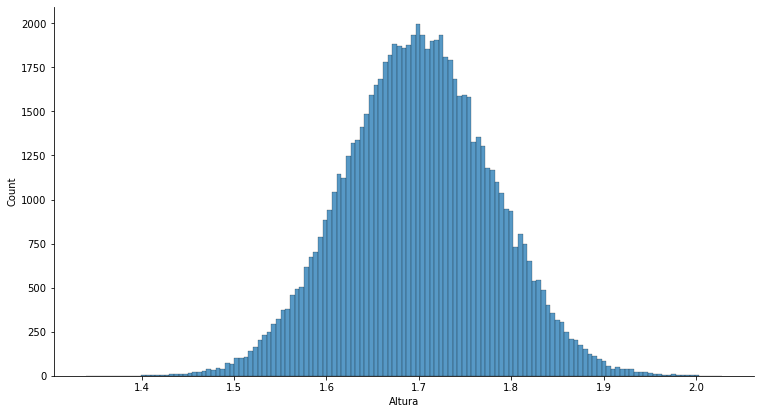

In [265]:
ax = sns.displot(dados.Altura)
ax.figure.set_size_inches(12,6)
ax.set_titles('Distribuição de frequencias')
ax = ax

,Quantidade,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


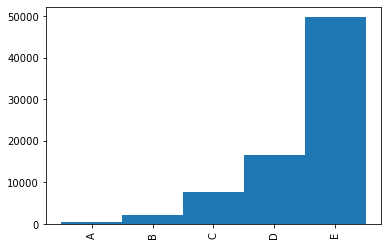

In [266]:
from ctypes.wintypes import SIZE
from turtle import width


dist_freq_quantitativas['Quantidade'].plot.bar(width=1)
dist_freq_quantitativas

<h1> Resumo </h1>
<p>A criar distribuições de frequências (tabelas de frequências) com a função value_counts() do pandas.<br>
A criar distribuições de frequências, com o cruzamento de duas variáveis, utilizando a função crosstab() do pandas.<br>
A criar distribuições de frequências, com classes personalizadas, utilizando as funções value_counts() e cut() conjuntamente.<br>
A utilizar a regra de Sturges para obter um número de classes ótimo para determinado tamanho de amostra.<br>
A plotar o histograma, que é a representação gráfica de uma distribuição de frequências.</p>

In [267]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [268]:
# Média

df['Fulano'].mean()


7.714285714285714

In [269]:
dados.mean()

UF                  31.912962
Sexo                 0.307002
Idade               44.071421
Cor                  5.032613
Anos de Estudo       9.469664
Renda             2000.383199
Altura               1.699512
dtype: float64

In [270]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [271]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [272]:
dados.groupby(['Sexo'])['Renda'].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
0,53250.0,2192.441596,3590.312915,0.0,800.0,1350.0,2300.0,200000.0
1,23590.0,1566.847393,2570.663414,0.0,700.0,900.0,1500.0,120000.0


In [273]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [274]:
dataset['Idade'].mean()

46.1

In [275]:
dataset.groupby(['Sexo'], as_index=False).mean()

,Sexo,Idade
0,H,45.750000
1,M,46.333333


In [276]:
notas_fulano = df.Fulano

In [277]:
notas = notas_fulano.sort_values()
mediana = int((len(notas) + 1) / 2)

notas.iloc[mediana]

8

In [278]:
notas.median()

8.0

In [279]:
dados.Renda.median()

1200.0

Moda

In [280]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [281]:
exemplo = pd.Series([1,1,2,2,34,4,6,345,7,5,7,456,4567,46,35,3])
exemplo.mode()

0    1
1    2
2    7
dtype: int64

In [282]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

In [283]:
data = [
'Big Mac',
'Quarteirão',
'Big Mac',
'Big Mac',
'Cheeseburguer',
'Big Mac',
'Quarteirão',
'Quarteirão',
'Mc Fish',
'Quarteirão',
'Cheeseburguer']

data = pd.Series(data)

In [284]:
data.mode()

0       Big Mac
1    Quarteirão
dtype: object

<h1>Relação entre média, mediana e moda</h1>

/tmp/ipykernel_5634/42635033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


,Média,Moda,Mediana
0,2000.383199,788,1200.0


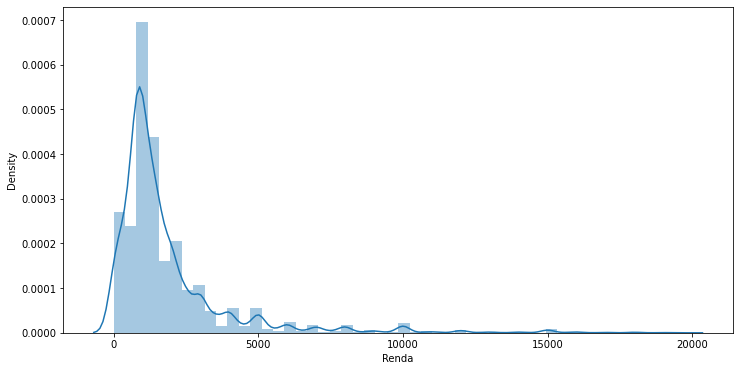

In [285]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

    

def calcular_tudo(data: pd.DataFrame or pd.Series, coluna: str):
    mediana = data[coluna].median()
    media = data[coluna].mean()
    moda = data[coluna].mode()
    data_final =  pd.DataFrame({
    'Média': media,
    'Moda': moda,
    'Mediana': mediana,
   })

    
    display(data_final)
    

calcular_tudo(dados, 'Renda')

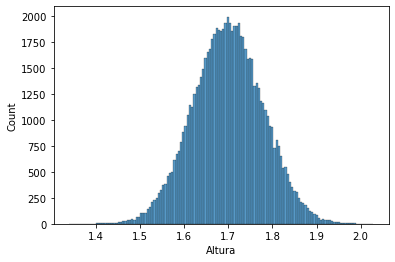

In [286]:
ax = sns.histplot(dados.Altura)

<h1> Medidas separatrizes 

In [287]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [288]:
[i/100 for i in range(1, 10)]

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [289]:
dados.Idade.quantile([i/100 for i in range(1,10)])

0.01    21.0
0.02    22.0
0.03    23.0
0.04    24.0
0.05    25.0
0.06    26.0
0.07    26.0
0.08    27.0
0.09    28.0
Name: Idade, dtype: float64

/tmp/ipykernel_5634/352231439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade, hist_kws= {'cumulative': True}, kde_kws={'cumulative':True}, bins=10)


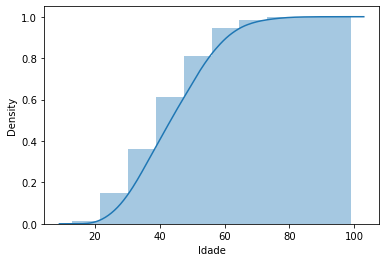

In [290]:
ax = sns.distplot(dados.Idade, hist_kws= {'cumulative': True}, kde_kws={'cumulative':True}, bins=10)


<h1> Box Plot

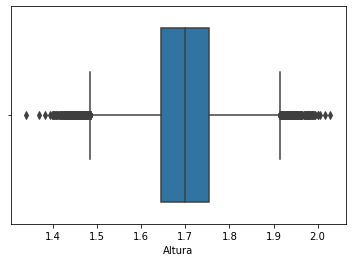

In [291]:
ax = sns.boxplot(x='Altura', data=dados, orient='h')

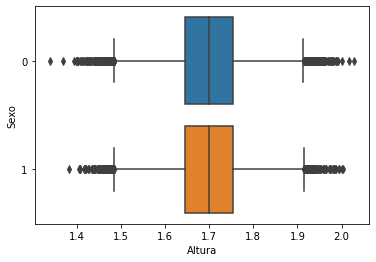

In [292]:
ax = sns.boxplot(x='Altura',y = 'Sexo',  data=dados, orient='h')

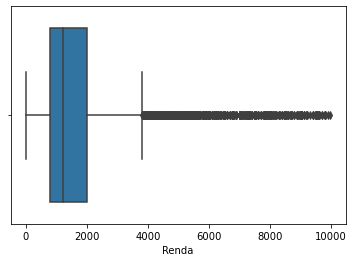

In [293]:
ax = sns.boxplot(x='Renda', data=dados.query('Renda < 10000'), orient='h')

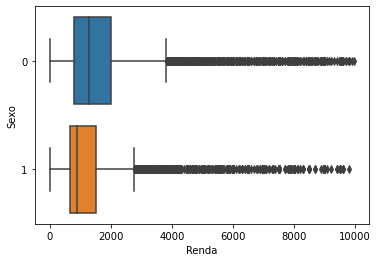

In [294]:
ax = sns.boxplot(x='Renda', y='Sexo', data=dados.query('Renda < 10000'), orient='h')

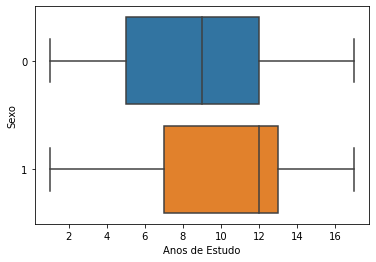

In [295]:
ax = sns.boxplot(x='Anos de Estudo', y ='Sexo', data=dados, orient='h')

<AxesSubplot:title={'center':'Renda (R$) - Bahia X São Paulo'}, xlabel='R$', ylabel='UF'>

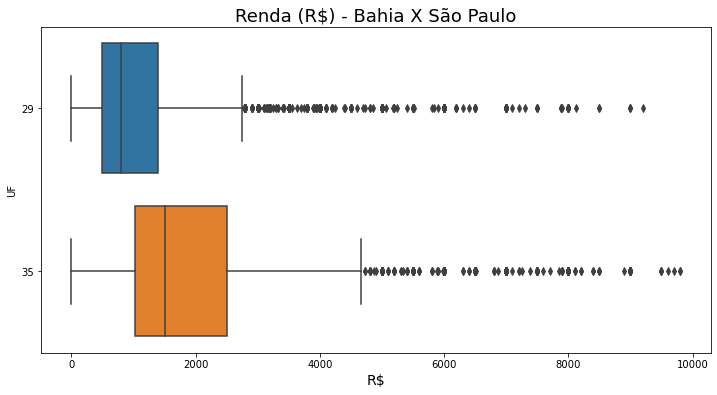

In [296]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<h1> Medidas de disperção

In [297]:
df.mean()


Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [298]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

<h1> Desvio medio absoluto

In [299]:
notas_fulano =  df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [300]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [301]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano['Desvio'] = notas_fulano['Desvio'].abs()
notas_fulano.Desvio.mean()

/tmp/ipykernel_5634/2218845992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
/tmp/ipykernel_5634/2218845992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Desvio'].abs()


1.5510204081632648

In [302]:
df['Fulano'].mad()

/tmp/ipykernel_5634/4261431300.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['Fulano'].mad()


1.5510204081632648

In [303]:
df2 = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df2.rename_axis('Matérias', axis = 'columns', inplace = True)
df2.agg(['mad'])

/tmp/ipykernel_5634/3730349842.py:11: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df2.agg(['mad'])
/tmp/ipykernel_5634/3730349842.py:11: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df2.agg(['mad'])


Matérias,Fulano,Sicrano
mad,1.55102,0.469388


<h1> Variancia

In [311]:
notas_fulano['(desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano['(desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [314]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

<h1> Desvio padão

In [317]:
np.sqrt(variancia)

2.1380899352993947

In [321]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao


2.1380899352993947

In [322]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [323]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [324]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [325]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [333]:
df.describe()

Matérias,Fulano,Beltrano,Sicrano
count,7.000000,7.000000,7.000000
mean,7.714286,5.142857,7.714286
std,2.138090,4.460141,0.566947
min,4.000000,0.500000,7.000000
25%,7.000000,1.500000,7.250000
50%,8.000000,3.000000,8.000000
75%,9.000000,9.750000,8.000000
max,10.000000,10.000000,8.500000


In [339]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

dataset.groupby('Sexo').describe()

Idade                                                     
     count       mean        std   min   25%   50%    75%   max
Sexo                                                           
H      4.0  45.750000  11.898879  32.0  38.0  46.5  54.25  58.0
M      6.0  46.333333  16.645320  27.0  33.5  47.5  53.25  72.0

In [340]:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64